<a href="https://colab.research.google.com/github/abhishek7260/MODEL/blob/main/milkgrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
df=pd.read_csv("Milk Grading (1).csv")

In [ ]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,1.0
1,6.6,36,0,1,0,1,253,1.0
2,8.5,70,1,1,1,1,246,0.0
3,9.5,34,1,1,0,1,255,0.0
4,6.6,37,0,0,0,0,255,0.5


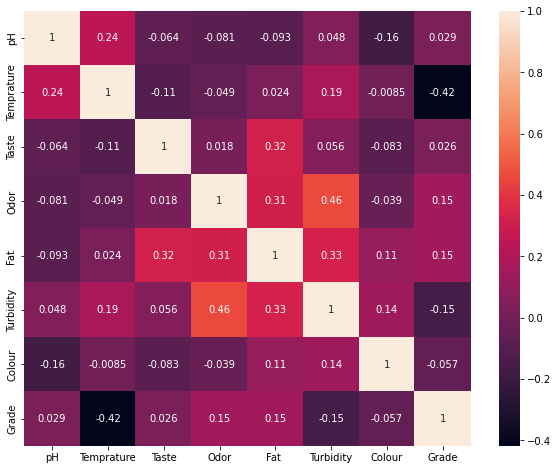

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415,0.418319
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424,0.393934
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000,0.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000,0.500000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,0.500000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000


In [ ]:
df.corr()['Grade']

pH            0.028980
Temprature   -0.417789
Taste         0.025500
Odor          0.149626
Fat           0.151002
Turbidity    -0.153634
Colour       -0.056986
Grade         1.000000
Name: Grade, dtype: float64

In [ ]:
df.skew()

pH           -0.683904
Temprature    2.216739
Taste        -0.188058
Odor          0.272949
Fat          -0.730799
Turbidity     0.035940
Colour       -1.024902
Grade         0.297174
dtype: float64

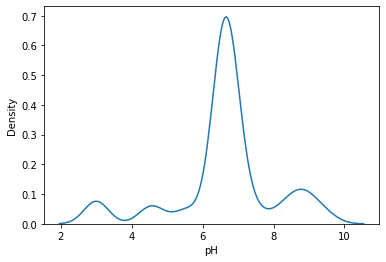

In [ ]:
sns.kdeplot(x='pH',data=df)

In [ ]:
x=df[(df['pH']>5) & (df['pH']<7.3)]
len(x)

722

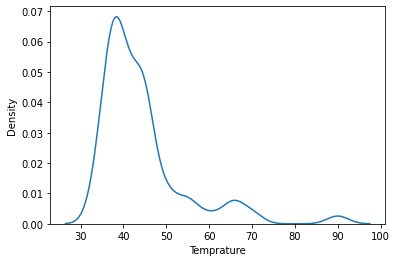

In [ ]:
sns.kdeplot(x='Temprature',data=df)

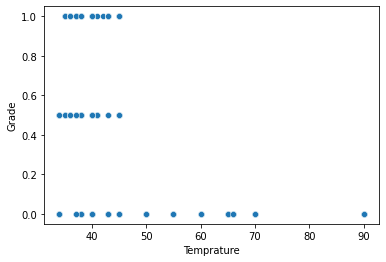

In [ ]:
sns.scatterplot(x='Temprature',y='Grade',data=df)

In [ ]:
z=df[(df['Temprature']>70) & (df['Temprature']<=90)]
len(z)

17

In [ ]:
df=df.drop([13,58,106,162,106,162,190,213,290,318,341,426,469,525,604,675,737,765,788],axis=0)

In [ ]:
z=df[(df['Temprature']>70) & (df['Temprature']<=90)]
len(z)

0

In [ ]:
x=df.drop(['Grade','Colour'],axis=1)

In [ ]:
y=df['Grade']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
print(len(x_train))
print(x_train)
from sklearn.preprocessing import StandardScaler


729
      pH  Temprature  Taste  Odor  Fat   Turbidity
780  6.6          37      1     1     1          1
542  6.8          45      1     1     1          0
746  6.5          38      1     1     1          1
714  6.6          38      1     0     1          0
331  6.8          40      1     0     1          0
..   ...         ...    ...   ...   ...        ...
587  6.8          40      1     1     1          1
990  6.6          37      1     0     1          0
77   6.8          36      0     1     1          0
612  6.8          41      0     0     0          0
880  6.8          45      0     1     1          1

[729 rows x 6 columns]


In [ ]:
len(y_train)

729

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import DBSCAN
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
param1={'penalty':['l2','elasticnet']}
param2={'kernel':['rbf','sigmoid','poly','linear'],'gamma':['scale']}
param3={'n_estimators':[100,50,150,200,500]}
param4={'n_clusters':[2],'max_iter':[300,200,400]}
param5={'n_estimators':[200,300,100,400]}
param6={'loss':['log_loss','exponential'],'n_estimators':[100,200,400,500],'learning_rate':[0.1,0.5,0.7]}

In [ ]:
rfc=RandomForestClassifier()
lr=LogisticRegression()
sv=SVC()
km=KMeans()
ad=AdaBoostClassifier()
gd=GradientBoostingClassifier()

In [ ]:
model=GridSearchCV(rfc,param3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[125   0   1]
 [  0 113   1]
 [  0   0  73]]
0.9936102236421726


In [ ]:
filename='milk_grading_model'
pickle.dump(model,open(filename,'wb'))